### Simulating deletions

In [6]:
import cobra
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cobra.io import read_sbml_model
model = read_sbml_model('C:/Users/User/Downloads/e_coli_core.xml')
from cobra.flux_analysis import(single_gene_deletion, single_reaction_deletion, double_gene_deletion, double_reaction_deletion)
from cobra.medium import minimal_medium

In [37]:
# knock-out - reaction not allowed to have flux at all

print('Complete model:', model.optimize())
model.reactions.PFK.knock_out()
print('PFK knock-out model:',model.optimize())

Complete model: <Solution 0.874 at 0x29b3075c7c8>
PFK knock-out model: <Solution 0.704 at 0x29b3075c508>


Text(0, 0.5, 'Growth')

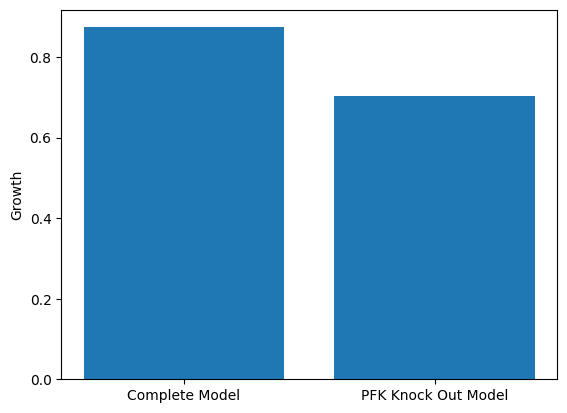

In [43]:
# Displaying graphically

Complete_model_flux = model.optimize()
model.reactions.PFK.knock_out()
PFK_knock_out_flux = model.optimize()

Fluxes = [Complete_model_flux.objective_value,PFK_knock_out_flux.objective_value]

Models = ['Complete Model','PFK Knock Out Model']
 
plt.bar(Models, Fluxes)
plt.ylabel('Growth')

In [21]:
# Performing all single gene deletions on a model

deletion_results = single_gene_deletion(model)
deletion_results

,ids,growth,status
0,{b0978},0.704037,optimal
1,{b0723},0.704037,optimal
2,{b3738},0.134755,optimal
3,{b3386},0.704037,optimal
4,{b4077},0.704037,optimal
...,...,...,...
132,{b0726},0.704037,optimal
133,{b2297},0.704037,optimal
134,{b2283},NaN,infeasible
135,{b3735},0.134755,optimal


<AxesSubplot:xlabel='ids'>

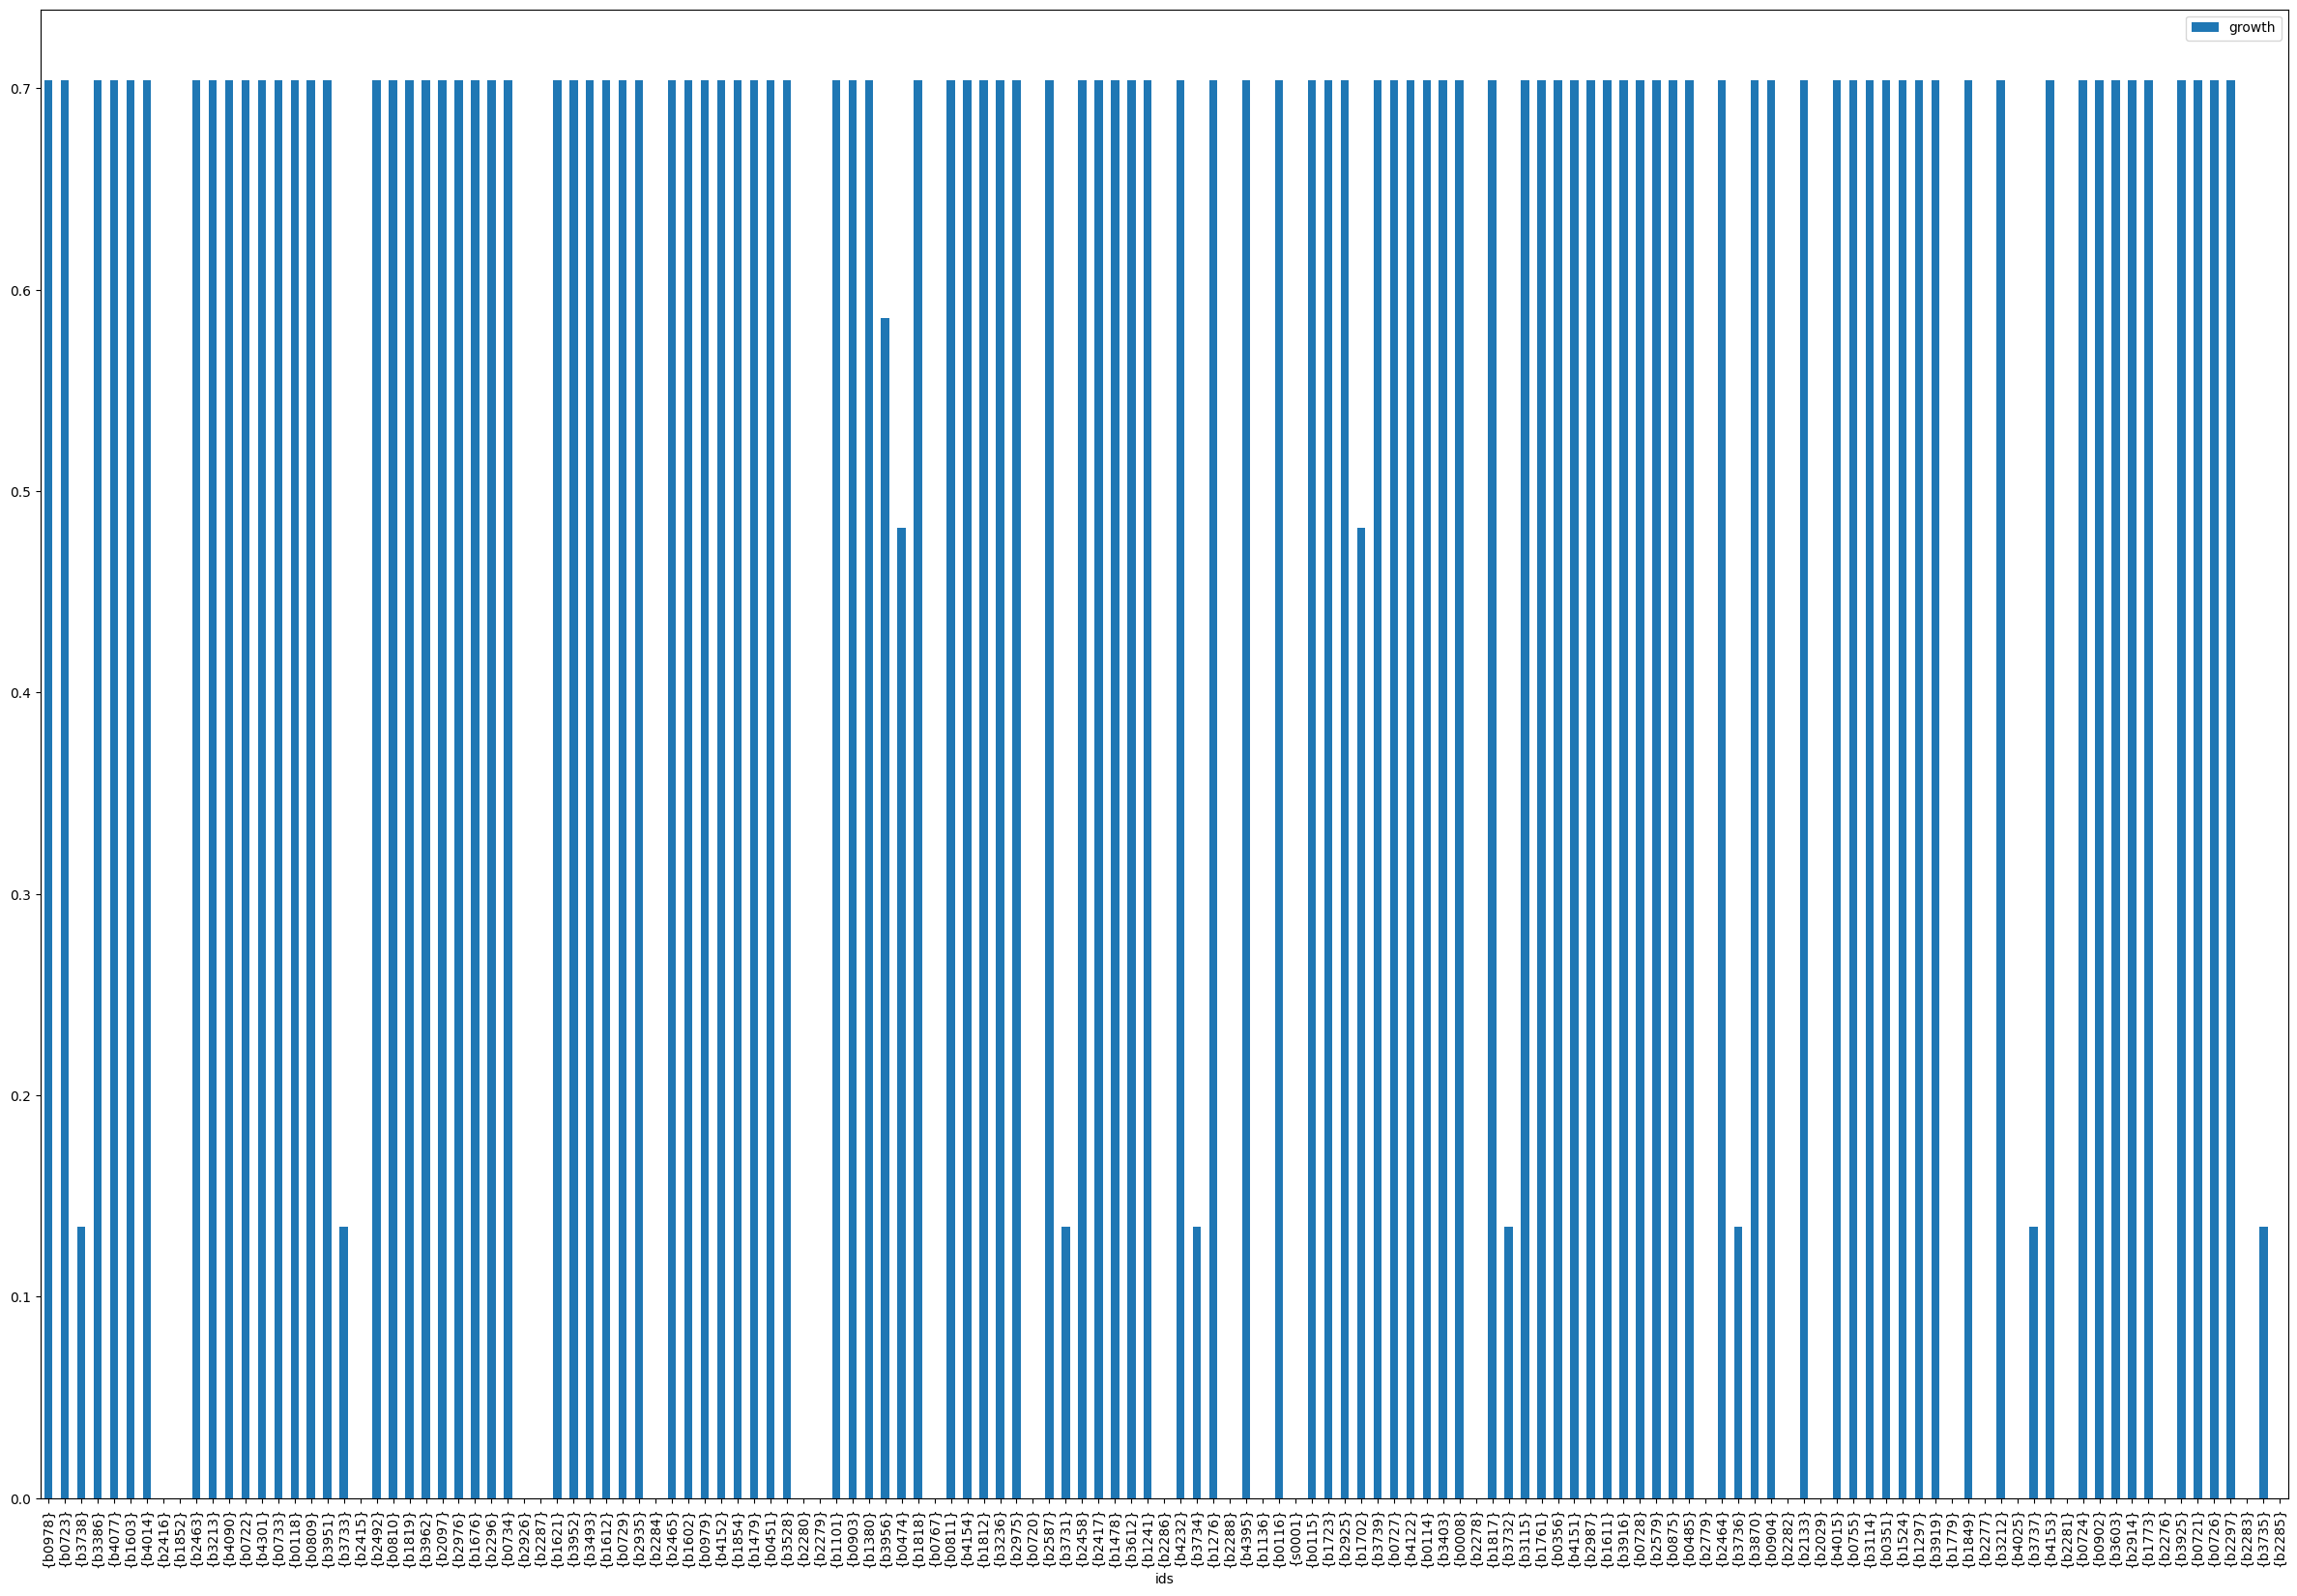

In [27]:
df = pd.DataFrame(deletion_results)
df.plot.bar(x='ids', y='growth', figsize=(30, 20))

In [46]:
# Performing all single single reaction deletions on the model

reaction_deletions = single_reaction_deletion(model)
reaction_deletions

,ids,growth,status
0,{D_LACt2},8.739215e-01,optimal
1,{TKT2},8.666741e-01,optimal
2,{O2t},2.116629e-01,optimal
3,{TPI},7.040369e-01,optimal
4,{ACONTa},2.425875e-16,optimal
...,...,...,...
90,{EX_mal__L_e},8.739215e-01,optimal
91,{TALA},8.647592e-01,optimal
92,{ENO},1.203591e-18,optimal
93,{ETOHt2r},8.739215e-01,optimal


<AxesSubplot:xlabel='ids'>

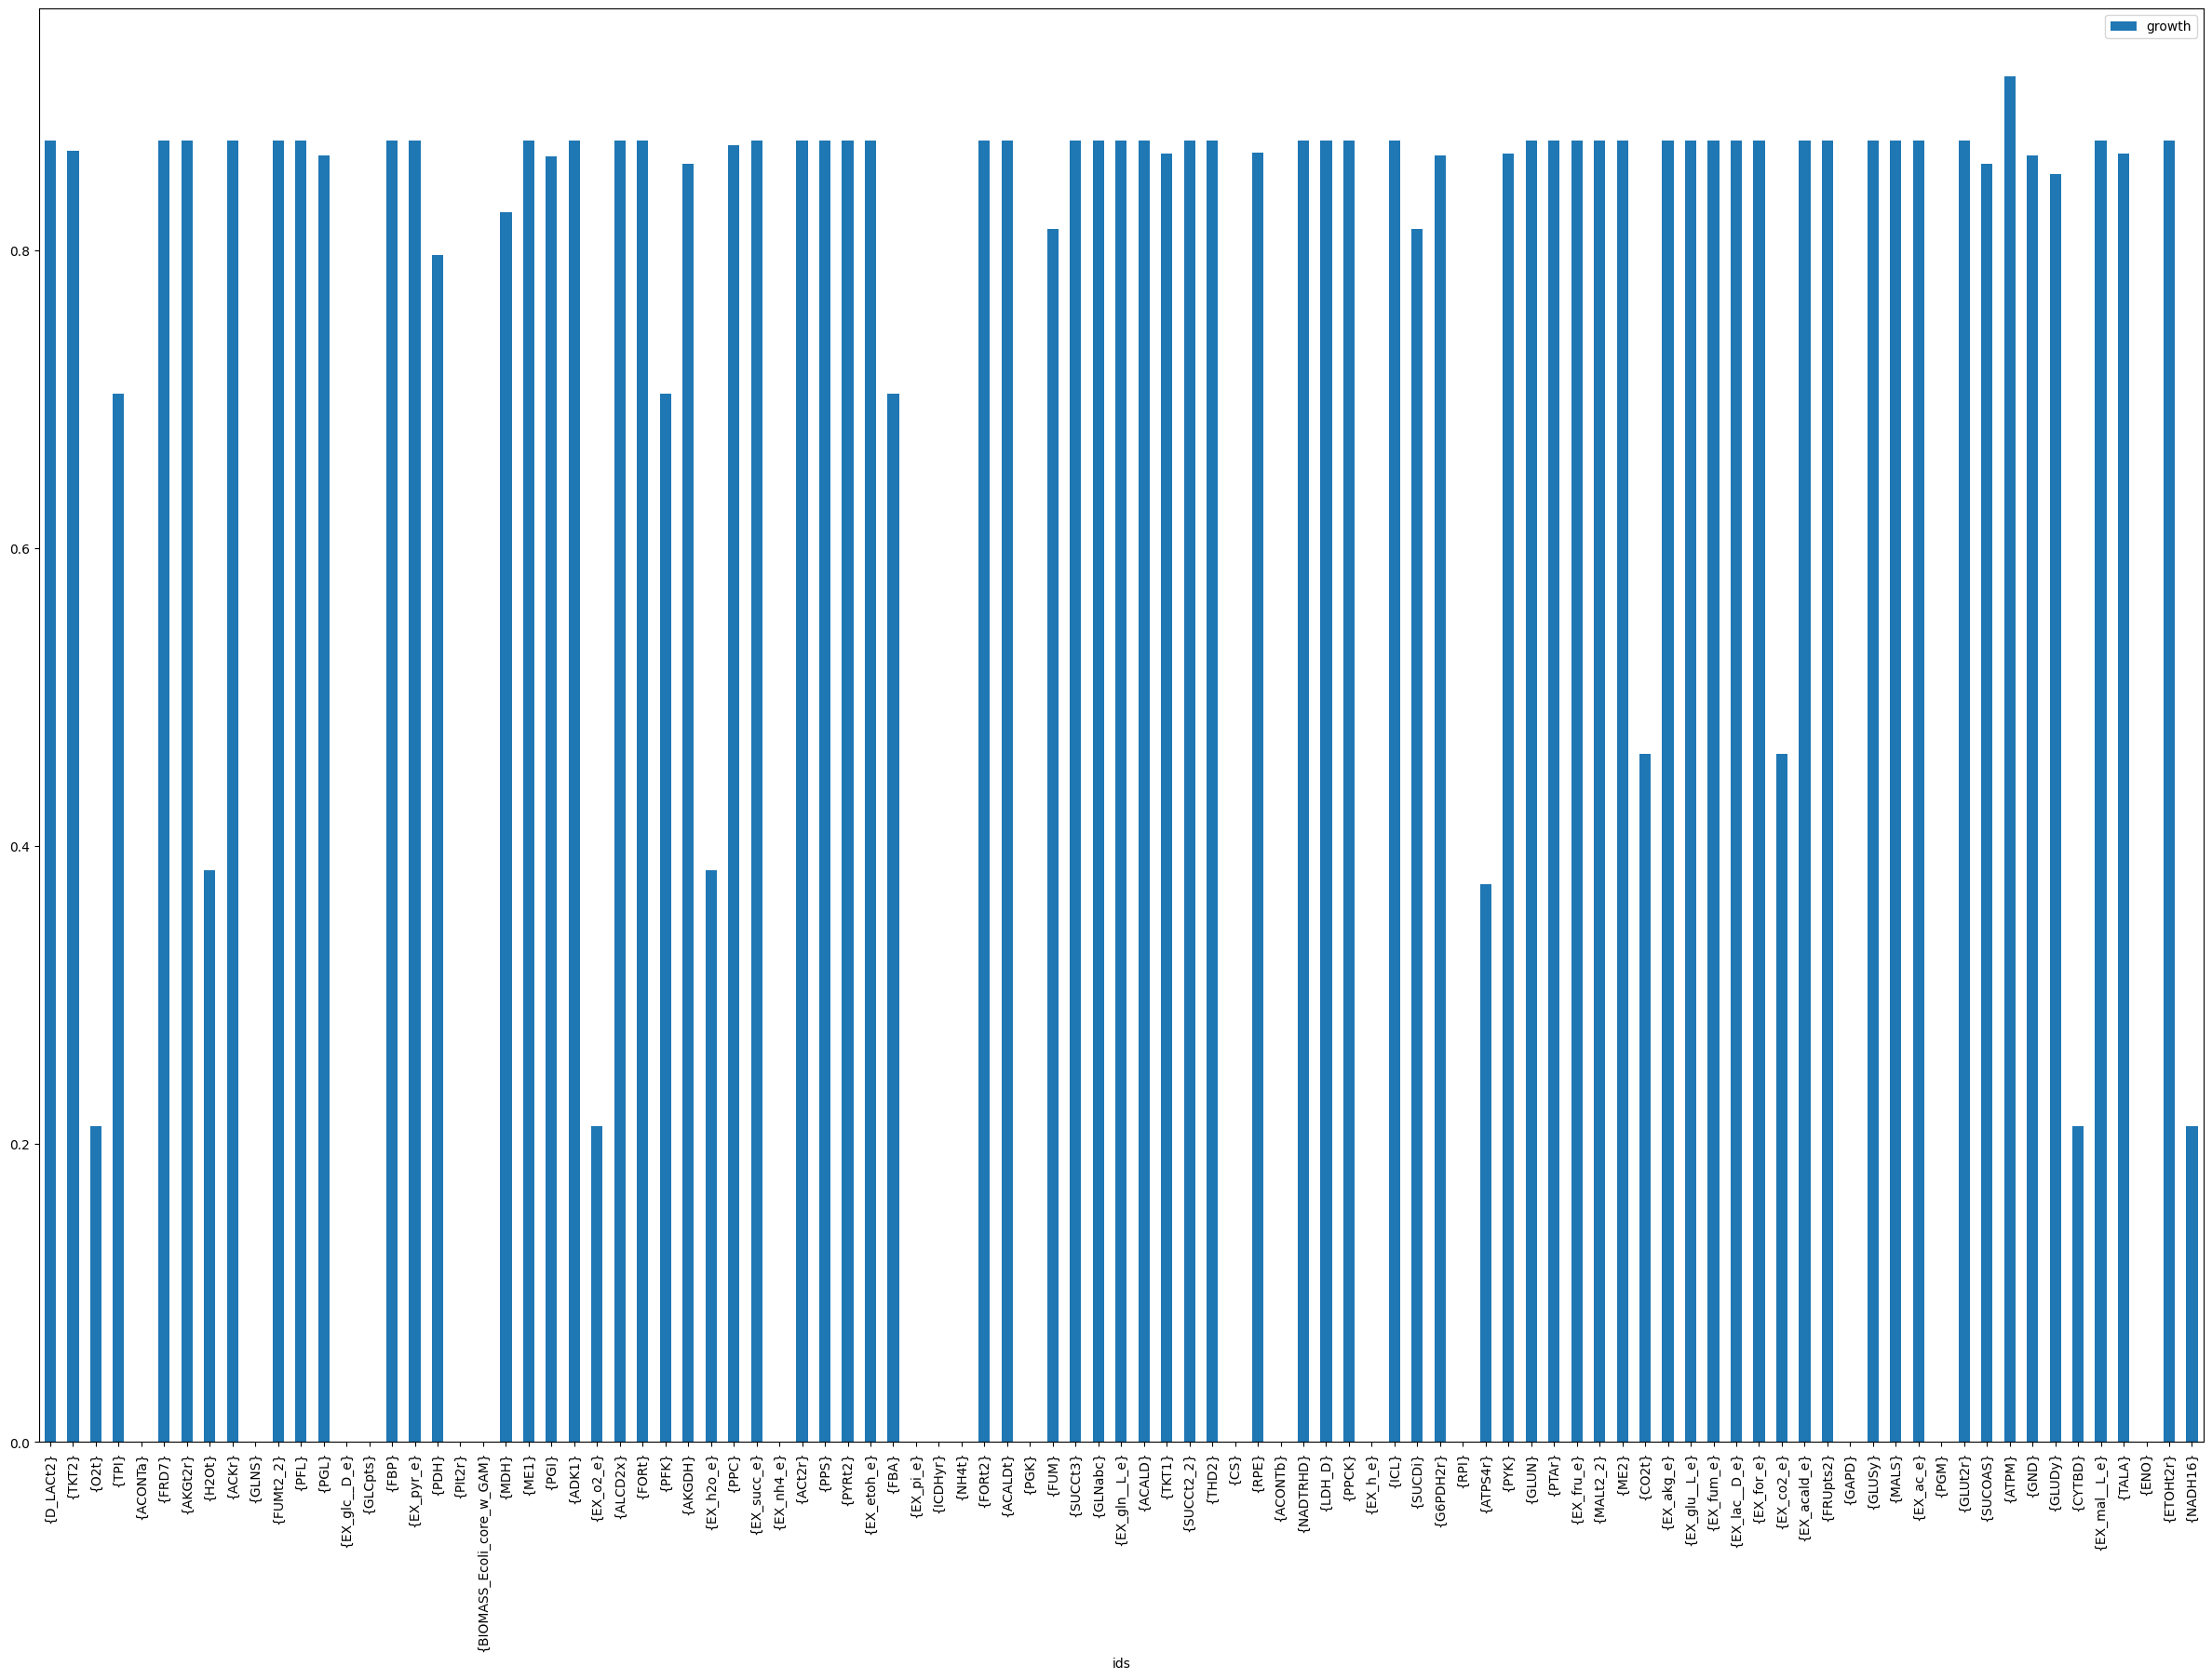

In [47]:
df = pd.DataFrame(reaction_deletions)
df.plot.bar(x='ids', y='growth', figsize=(30, 20))

In [49]:
# Comparing double deletion results

single = single_reaction_deletion(model)
double = double_reaction_deletion(model)

print('ATPM', single.knockout['ATPM'])
print('ATPM + EX_o2_e', double.knockout[{'ATPM','EX_o2_e'}])

ATPM        ids    growth   status
88  {ATPM}  0.916647  optimal
ATPM + EX_o2_e                  ids    growth   status
273  {EX_o2_e, ATPM}  0.304591  optimal


In [13]:
# Displaying double deletion results graphically

single_deletion_result = single_reaction_deletion(model).knockout['ATPM']
double_deletion_result = double_reaction_deletion(model).knockout[{'ATPM','EX_o2_e'}]

growth_fluxes = [single_deletion_result.iat[0,1], double_deletion_result.iat[0,1]]
models = ['ATPM knock out','ATPM + EX_o2_e knock out']

Text(0, 0.5, 'Growth Flux')

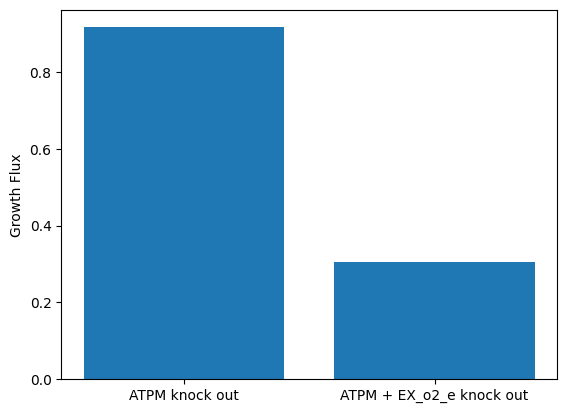

In [15]:
plt.bar(models, growth_fluxes)
plt.ylabel("Growth Flux")

### Changing Growth Medium

In [16]:
# Investigating the current growth medium of the model

model.medium

{'EX_co2_e': 1000.0,
 'EX_glc__D_e': 10.0,
 'EX_h_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_pi_e': 1000.0}

In [20]:
# Changing the metabolism from aerobic growth to anaerobic growth

medium = model.medium
medium['EX_o2_e'] = 0.0
model.medium = medium

model.medium # EX_o2_e no longer appears because this dictionary only provides the exchange reactions with non-zero upper flux bounds

{'EX_co2_e': 1000.0,
 'EX_glc__D_e': 10.0,
 'EX_h_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_pi_e': 1000.0}

In [26]:
anaerobic_flux = model.slim_optimize() # Optimizes the flux only through the objective function
anaerobic_flux

0.2116629497353107

In [28]:
aerobic_flux = model.slim_optimize()
aerobic_flux

0.8739215069684295

Text(0, 0.5, 'Growth')

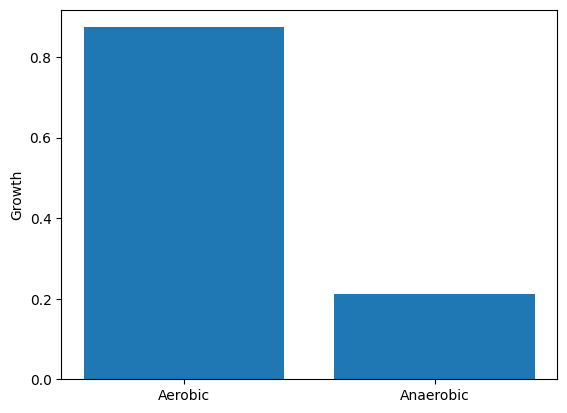

In [29]:
fluxes = [aerobic_flux,anaerobic_flux]
models = ['Aerobic','Anaerobic']
plt.bar(models,fluxes)
plt.ylabel('Growth')

### Minimal Media
-  smallest growth medium that can maintain a specific growth rate

In [31]:
max_growth = model.slim_optimize() # variable to hold the specific growth rate to be achieved
minimal_medium(model,max_growth)

EX_glc__D_e    10.000000
EX_nh4_e        4.765319
EX_o2_e        21.799493
EX_pi_e         3.214895
dtype: float64

In [ ]:
# Above results show that Glucose import is the limiting factor of growth

In [2]:
# Comparative representation graphically

normal_medium = model.medium
normal_medium

{'EX_co2_e': 1000.0,
 'EX_glc__D_e': 10.0,
 'EX_h_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_pi_e': 1000.0}

In [3]:
#Extracting keys of the dictionary to a list
normal_medium_keys = list(normal_medium.keys())
normal_medium_keys

['EX_co2_e',
 'EX_glc__D_e',
 'EX_h_e',
 'EX_h2o_e',
 'EX_nh4_e',
 'EX_o2_e',
 'EX_pi_e']

In [4]:
normal_medium_values = list(normal_medium.values())
normal_medium_values

[1000.0, 10.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0]

In [5]:
max_growth = model.slim_optimize()
minimalmedium = minimal_medium(model,max_growth)
minimalmedium

EX_glc__D_e    10.000000
EX_nh4_e        4.765319
EX_o2_e        21.799493
EX_pi_e         3.214895
dtype: float64

In [6]:
minimal_medium_keys = minimalmedium.keys()
minimal_medium_values=[]
for r in normal_medium_keys:
    if r in minimal_medium_keys:
        minimal_medium_values.append(minimalmedium[r])
    else:
        minimal_medium_values.append(0)
minimal_medium_values

[0, 10.0, 0, 0, 4.765319193197451, 21.79949265599872, 3.214895047684755]

In [7]:
print(type(normal_medium_values))

<class 'list'>


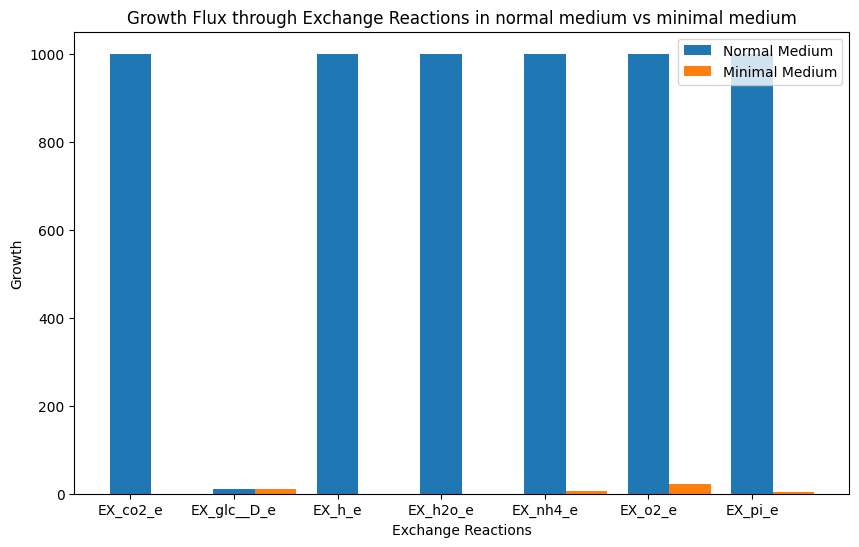

In [12]:
X = np.arange(len(normal_medium_keys))
width = 0.4
plt.figure(figsize=(10, 6))
plt.bar(X, normal_medium_values, width, label = 'Normal Medium')
plt.bar(X + width, minimal_medium_values, width, label = 'Minimal Medium')
plt.xticks(X,normal_medium_keys) 
plt.xlabel("Exchange Reactions") 
plt.ylabel("Growth") 
plt.title("Growth Flux through Exchange Reactions in normal medium vs minimal medium")
plt.legend()

### Minimal medium with the smallest number of active imports

In [4]:
minimal_medium(model, 0.1, minimize_components =True)
# 0.1 = threshold concentration for the nutrients in the medium, in terms of how much of each nutrient is required

EX_glc__D_e    10.00000
EX_nh4_e        0.54528
EX_pi_e         0.36787
dtype: float64

In [7]:
# Obtaining a defined no. of alternative solutions with minimized input fluxes

minimal_medium(model, 0.8, minimize_components =8, open_exchanges=True)

# positive integer to minimize_components - give you at most that many alternative solutions
# open_exchanges argument - assign a large upper bound to all import reactions in the model

,0,1,2,3,4
EX_fru_e,0.000000,0.000000,0.000000,520.409598,0.000000
EX_glc__D_e,0.000000,521.819343,0.000000,0.000000,515.152976
EX_gln__L_e,0.000000,0.000000,18.848678,0.000000,0.000000
EX_glu__L_e,278.649881,109.185926,0.000000,117.245975,0.000000
EX_mal__L_e,0.000000,0.000000,1000.000000,0.000000,0.000000
EX_nh4_e,0.000000,0.000000,0.000000,0.000000,54.761008
EX_o2_e,500.000000,0.000000,0.000000,0.000000,0.000000
EX_pi_e,47.394369,56.581713,12.583458,56.487822,36.944198
